In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
df = pd.read_csv('Processed_Data.csv',lineterminator='\n')
df

,Unnamed: 0,topic,tweet,sentiment,class,processed_tweets
0,0,#olympics,Aussies would be happy that the T20 series hap...,0.275000,Positive,aussie would happy series happen midst olympic...
1,1,#olympics,The worst thing about the #Olympics finishing ...,-0.133333,Negative,worst thing olympics finish whole week availab...
2,2,#olympics,#Olympics\n\nWe play for India: #Hockey captai...,0.000000,Neutral,olympics play india hockey captain ranirampal ...
3,3,#olympics,See the best moments from the #Tokyo2020 closi...,1.000000,Positive,see best moment tokyo close ceremony videoelep...
4,4,#olympics,Fabulous! #Olympics \n#LoveTheBBC \n\nTokyo Ol...,0.500000,Positive,fabulous olympics lovethebbc tokyo olympics bb...
...,...,...,...,...,...,...
140242,140242,Tokyo olympics,Congratulations to all our winners and partici...,0.500000,Positive,congratulation winner participant olympics win...
140243,140243,Tokyo olympics,I hope that I am wrong but I have seen no twee...,-0.500000,Negative,hope wrong see tweet government
140244,140244,Tokyo olympics,Tokyo passes the baton to Paris as strangest e...,0.000000,Neutral,tokyo pass baton paris strangest ever olympic ...
140245,140245,Tokyo olympics,"Paris plans to deliver inclusive, youth-centre...",0.000000,Neutral,paris plan deliver inclusive youth centre gend...


In [ ]:
df = df.dropna()

In [ ]:
x = df['processed_tweets']
y = df['class']
print(x.shape, "and", y.shape)

(139715,) and (139715,)


In [ ]:
unique_word = []

for i in x:
  for j in i.split():
    unique_word.append(j)

unique, counts = np.unique(unique_word,return_counts = True)

In [ ]:
print("Total words in the tweets", len(unique_word))
print("Unique Words in the tweets", len(unique))

Total words in the tweets 1299205
Unique Words in the tweets 42087


In [ ]:
tweet_length = []

for i in x:
  tweet_length.append(len(i.split()))

In [ ]:
print("Max length of any tweet", np.max(tweet_length))
print("Min length of any tweet",np.min(tweet_length))

Max length of any tweet 24
Min length of any tweet 1


In [ ]:
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:11,:]

Top 20 Occuring Words with their frequency are:


,0,1
0,olympics,56924
1,tokyo,52438
2,gold,28888
3,medalist,25533
4,olympic,21696
5,japan,20356
6,medal,16137
7,athlete,14262
8,thank,8582
9,game,8477


In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt

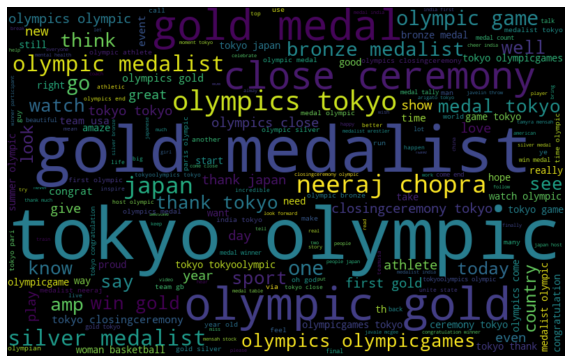

In [ ]:
all_words = ' '.join([text for text in df['processed_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

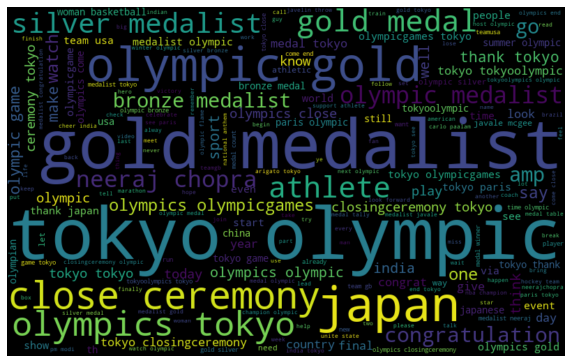

In [ ]:
neutral_words = ' '.join([text for text in df['processed_tweets'][df['class'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex

import urllib
import requests

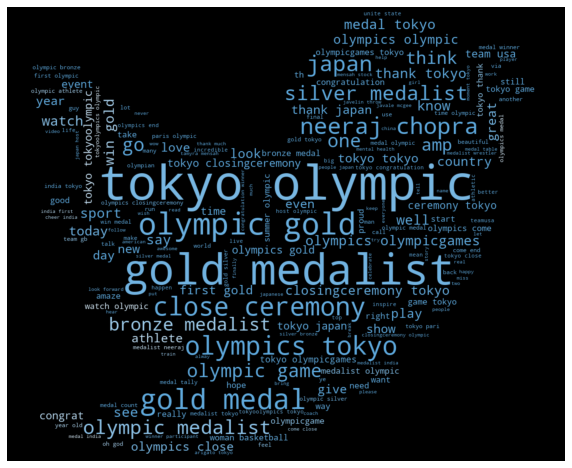

In [ ]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(all_words)

# Size of the image generated 
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()
